In [23]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
#Heirarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#K-means clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
Airlines=pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\Clustering\\EastWestAirlines1.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines=Airlines.drop(['ID#'],axis=1)


In [4]:
#rename all the columns 
Airlines1 = Airlines.rename({'Qual_miles':'qm','cc1_miles':'cc1m','cc2_miles':'cc2m','cc3_miles':'cc3m','Bonus_miles':'bm','Bonus_trans':'bt','Flight_miles_12mo':'fm12','Flight_trans_12':'ft12'},axis = 1)
Airlines1.head()

,Balance,qm,cc1m,cc2m,cc3m,bm,bt,fm12,ft12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(Airlines1)
df_norm

,Balance,qm,cc1m,cc2m,cc3m,bm,bt,fm12,ft12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Heirarchical clustering


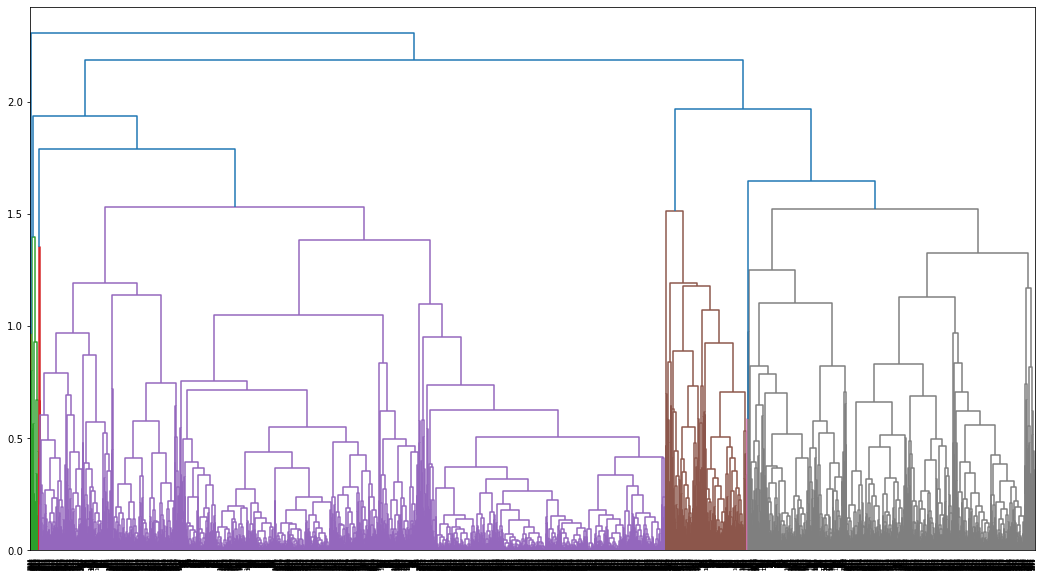

In [7]:
plt.figure(figsize=(18,10))  
dendograms=sch.dendrogram(sch.linkage(df_norm,'complete'))

In [8]:
agglo= AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
agglo

AgglomerativeClustering(n_clusters=6)

In [9]:
y=pd.DataFrame(agglo.fit_predict(df_norm),columns=['clusters'])
y['clusters'].value_counts()

1    1011
0     808
4     699
2     582
3     535
5     364
Name: clusters, dtype: int64

In [32]:
SilhouetteH=metrics.silhouette_score(df_norm,y , metric='euclidean')
SilhouetteH

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.33447794301195294

# K-means Clustering 

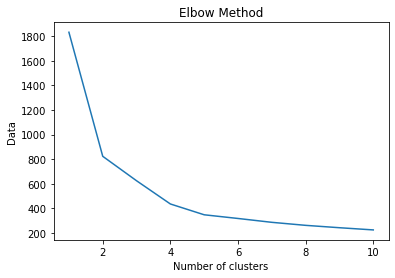

In [10]:
data = []
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm)
    data.append(kmeans.inertia_)
plt.plot(range(1, 11), data)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Data')
plt.show()

In [11]:
X = np.random.uniform(0,1,1000)
X

array([4.38245568e-01, 3.68421097e-01, 3.07806450e-01, 3.90347444e-01,
       3.64915973e-01, 6.01397753e-01, 3.53176350e-01, 3.41546128e-01,
       7.97666313e-01, 4.47264894e-01, 7.98764656e-01, 4.96676543e-01,
       7.44878956e-01, 6.56587337e-02, 2.25363703e-01, 9.18479345e-01,
       4.74446974e-01, 7.70038168e-01, 7.44405537e-01, 4.90604573e-01,
       1.67220794e-01, 5.01408670e-02, 2.82977109e-01, 4.30996968e-01,
       3.82063817e-01, 4.27933980e-01, 2.65083347e-01, 1.10373461e-01,
       7.49644383e-01, 6.42321361e-01, 2.15712743e-01, 4.39138687e-01,
       1.52844915e-01, 3.49573471e-01, 1.00823716e-02, 8.12802331e-01,
       4.29854107e-01, 1.66941458e-01, 6.46456939e-01, 8.08135015e-01,
       9.54166679e-02, 3.52222815e-01, 2.74687855e-02, 1.72780888e-01,
       9.09150150e-01, 2.35011506e-01, 3.23517680e-01, 6.69794965e-01,
       8.12234105e-01, 2.89375594e-01, 2.38906937e-01, 3.35182009e-01,
       1.28636703e-01, 1.36642130e-01, 3.03972263e-01, 7.52471861e-01,
      

In [24]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_

array([3, 3, 3, ..., 2, 4, 4])

In [31]:
SilhouetteK=metrics.silhouette_score(df_norm, model.labels_ , metric='euclidean')
SilhouetteK

0.44306720727960347

In [13]:
md=pd.Series(model.labels_)
Airlines1['cluster_no']=md 
df_norm.head()

,Balance,qm,cc1m,cc2m,cc3m,bm,bt,fm12,ft12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [14]:
Airlines1.iloc[:,1:5].groupby(Airlines1.cluster_no).mean()

,qm,cc1m,cc2m,cc3m
cluster_no,,,,
0,73.467638,3.584142,1.001618,1.022654
1,198.336634,3.915842,1.001238,1.025990
2,89.903226,1.122120,1.019585,1.001152
3,94.131783,1.070736,1.016473,1.006783
4,290.453195,1.156018,1.032689,1.008915


In [15]:
kmeans_cluster = pd.Series(model.labels_)
kmeans_cluster.value_counts()

3    1032
2     868
1     808
4     673
0     618
dtype: int64

# DBSCAN Clustering

In [16]:
array=Airlines1.values
array

array([[28143,     0,     1, ...,  7000,     0,     2],
       [19244,     0,     1, ...,  6968,     0,     2],
       [41354,     0,     1, ...,  7034,     0,     2],
       ...,
       [73597,     0,     3, ...,  1402,     1,     1],
       [54899,     0,     1, ...,  1401,     0,     3],
       [ 3016,     0,     1, ...,  1398,     0,     3]], dtype=int64)

In [17]:
st_scaler= StandardScaler().fit(array)
X =st_scaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -6.32359854e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -6.32359854e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -6.32359854e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -8.20363847e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  6.93891876e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  6.93891876e-01]])

In [27]:
dbscan = DBSCAN(eps=0.8, min_samples=11) 
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=11)

In [28]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [30]:
SilhouetteD=metrics.silhouette_score(df_norm, dbscan.labels_ , metric='euclidean')
SilhouetteD

0.2316375023919143

In [20]:
Airlines1

,Balance,qm,cc1m,cc2m,cc3m,bm,bt,fm12,ft12,Days_since_enroll,Award?,cluster_no
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,3


In [21]:
clt=pd.DataFrame(dbscan.labels_,columns=['cluster'])
clt

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,3
3997,0


In [22]:
pd.concat([Airlines1,clt],axis=1)

,Balance,qm,cc1m,cc2m,cc3m,bm,bt,fm12,ft12,Days_since_enroll,Award?,cluster_no,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,3,0
